In this Jupyter Notebook, I am going to create 2 Convolutional Neural Networks for the purposes of building a predictor for the MNIST handwritten digit data set. There are 60,000 photos of handwritten digits in the MNIST data set, and we will be using that data to learn our Convolutional Neural Networks.

For the first network, we are going to follow the following structure:
* A single conv2d layer
* One pooling layer
* One fully connected layer
* One softmax layer

The 2D convolutional layers are what processes the 2D MNIST input images. The first argument passed to Conv2D() is the number of output channels, which in our case is 32. The next is the kernel size, which in this example is a 5 by 5 moving window. Next, our activation function is specificed as "Rectified linear unit." Lastly, we are specifying the input shape as the dimensions of the image, which are 28 by 28 pixels, and 1 extra dimension added onto the end for weight.

In [1]:
from __future__ import absolute_import
from __future__ import print_function

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import keras
from keras.datasets import mnist
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pylab as plt
import matplotlib.cm as cm
import numpy as np
np.random.seed(1337)
np.set_printoptions(precision=5, suppress=True)
nb_classes = 10

# input image dimensions
img_x, img_y = 28, 28

# load the mnist data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape the data into a 4D tension - (sample numher, x_img_size, y_img_size, num_channles)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
X_train = X_train.reshape(X_train.shape[0], img_x, img_y, 1)
X_test = X_test.reshape(X_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

# convert the data to the right type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


The Sequential() function call generates a model skeleton for us from Keras. After that, I add an initial Convolution layer to the model, which I discussed in depth above. As for the MaxPooling2D layer, we just specify the size of the pooling in the x and y directions, which in this case is (2, 2). From there, we add a function called Flatten() to our model that just performs the task of flattening our output to enter our filly connected layers.

In [2]:
model1 = Sequential()

convout1 = Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=input_shape, activation='relu')
model1.add(convout1)
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy',
             optimizer='adadelta',
             metrics=['accuracy'])

import os
import h5py
WEIGHTS_FNAME = 'mnist_cnn_weights_v1.hdf'
if True and os.path.exists(WEIGHTS_FNAME):
    # Just change the True to false to force re-training
    print('Loading the existing weights')
    model1.load_weights(WEIGHTS_FNAME)
else:
    batch_size = 128
    nb_epoch = 10
    model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
              verbose=1, validation_data=(X_test, Y_test))
    model1.save_weights(WEIGHTS_FNAME, overwrite=True)

score = model1.evaluate(X_test, Y_test, verbose=0)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loading the existing weights
Test Score:  0.0347129139511555
Test Accuracy:  0.9882


In [3]:
# Time to view the resulting confusion matrix
np.set_printoptions(precision=3, suppress=True)
print(model1.predict(X_test[1:5]))
print(Y_test[1:5])

Y_pred = model1.predict(X_test)
# Convert one-hot to index
y_pred = np.argmax(Y_pred, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0

[ 115  247  320  321  340  359  445  582  674  717  720  740  813  844
  882  883  924  947  956 1014 1039 1112 1182 1226 1232 1242 1247 1260
 1319 1326 1364 1393 1414 1522 1530 1549 1553 1621 1681 1709 1754 1878
 1901 1903 2018 2035 2040 2043 2070 2118 2129 2130 2135 2182 2266 2293
 2406 2414 2488 2607 2654 2760 2896 2921 2927 2939 2995 3060 3073 3503
 3520 3558 3559 3597 3751 3767 3808 3853 3906 3941 3985 4075 4176 4201
 4238 4497 4575 4639 4740 4761 4807 4823 5331 5937 5955 5973 6091 6173
 6597 6608 6651 6783 8094 8183 8325 8408 8527 9009 9015 9019 9024 9634
 9638 9642 9664 9692 9729 9982]
(118,)
[(4, 9), (4, 2), (9, 8), (2, 7), (5, 3), (9, 4), (6, 0), (8, 2), (5, 3), (0, 6), (5, 8), (4, 9), (9, 8), (8, 7), (9, 7), (3, 5), (2, 7), (8, 9), (1, 2), (6, 5), (7, 2), (4, 6), (6, 8), (7, 2), (9, 4), (4, 9), (9, 5), (7, 1), (8, 0), (7, 2), (8, 2), (5, 3), (9, 7), (7, 9), (8, 7), (4, 2), (9, 3), (0, 6), (3, 7), (9, 3), (7, 2), (8, 3), (9, 4), (7, 2), (1, 7), (5, 3), (5, 6), (4, 8), (7, 9), 

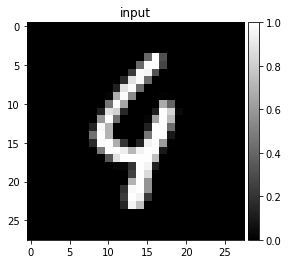

In [4]:
# Example of a mistaken number using np.where
mis_idx = np.where(y_test != y_pred)[0]
print(mis_idx)
print(mis_idx.shape)
print(list(zip(y_test[mis_idx], y_pred[mis_idx])))

# Visualize a convolved image
from keras import backend as K

inputs = [K.learning_phase()] + model1.inputs

_convout1_f = K.function(inputs, [convout1.output])
def convout1_f(X):
    # the [0] is to disable the training phase flag
    return _convout1_f([0] + [X])

from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around p1.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    plt.colorbar(im, cax=cax)
    
i = mis_idx[0]

# Visualize the first layer of convolutions on an input image
X = X_test[i:i+1]
print(X.shape)
print("target: {}".format(y_test[i]))
print("predicted: {}".format(y_pred[i]))
X.reshape(28, 28)
plt.figure()
plt.title('input')
nice_imshow(plt.gca(), np.squeeze(X), vmin=0, vmax=1, cmap=cm.gray)
plt.show()

In [5]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a mosaic with nrows and ncols
    """
    nimgs = imgs.shape[2]
    print(nimgs)
    imshape = imgs.shape[:2]
    print(imshape)
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                           ncols * imshape[1] + (ncols - 1) * border),
                          dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in range(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
              col * paddedw:col * paddedw + imshape[1]] = imgs[:, :, i]
    return mosaic

8
<class 'keras.layers.convolutional.Conv2D'>
W shape :  (3, 3, 32)
32
(3, 3)


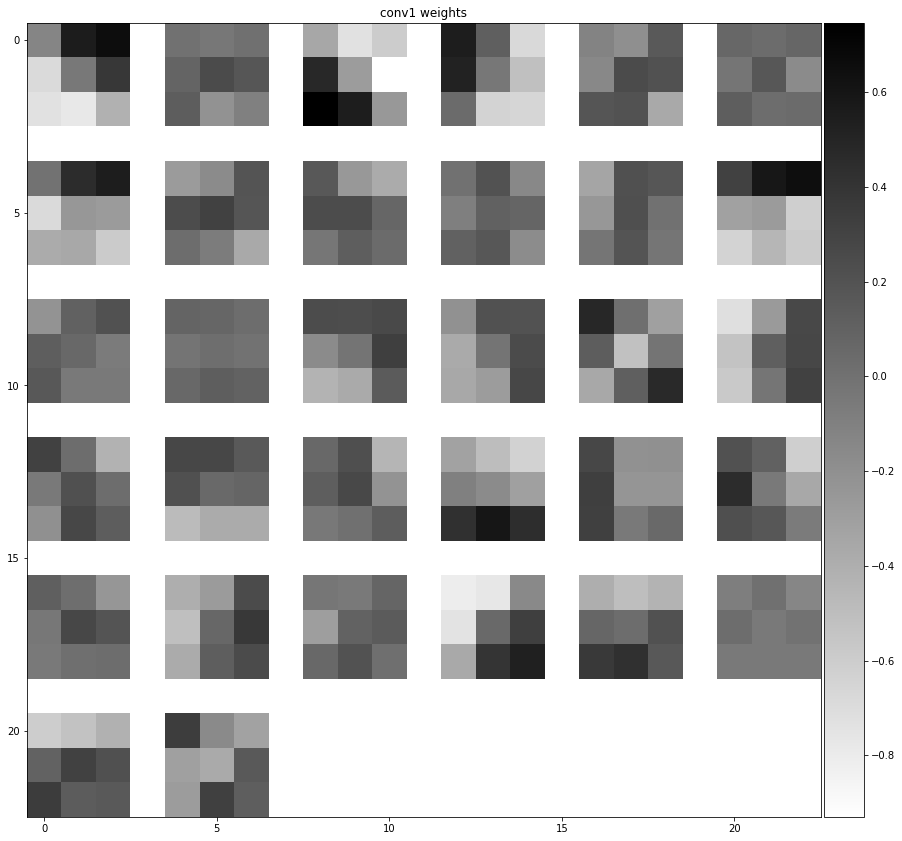

In [6]:
# Visualize Weights
print(len(model1.layers))
print(type(model1.layers[0]))
W = model1.layers[0].get_weights()[0]
W = np.squeeze(W)
print("W shape : ", W.shape)

plt.figure(figsize=(15, 15))
plt.title('conv1 weights')
nice_imshow(plt.gca(), make_mosaic(W, 6, 6), cmap=cm.binary)
plt.show()

C1 shape :  (28, 28, 32)
32
(28, 28)


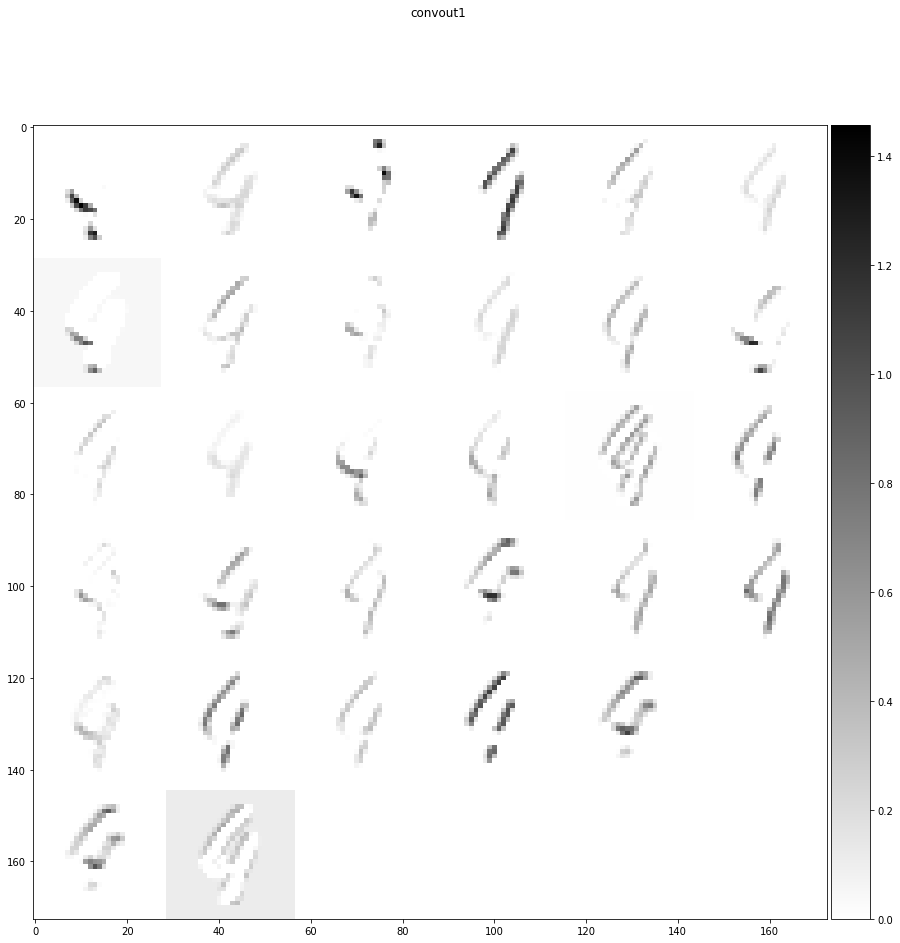

In [7]:
# Visualize convolution result (after activation)
C1 = convout1_f(X)
C1 = np.squeeze(C1)
print("C1 shape : ", C1.shape)

plt.figure(figsize=(15, 15))
plt.suptitle('convout1')
nice_imshow(plt.gca(), make_mosaic(C1, 6, 6), cmap=cm.binary)
plt.show()

Questions:

How many hidden layers are in your network?
The hidden layers of a CNN typically consist of convolutional layers, pooling layers, fully connected layers, and normalization layers. In model1, we have 1 Convolutional layer, 1 hidden layer, one fully connected layer, and one flattening layer. In total, this is 5 hidden layers.

How many convolutions are calculated in each convolution layer?
In our model of a convolutional neural network, we are using a technique called padding. To briefly explain why we need padding: When we take our 3 by 3 kernel with 9 spots within it, if the center of our kernel is close enough to the edge, part of our 3 by 3 kernel will be off the photo. To combat this, specifying the padding allows us to handle that situation in our neural network, and let our kernel hang off the edge by one space in the x direction and one space in the y direction. If each image is 28 by 28, we will have a total of 784 spaces. In order to accounts for the extra row we will need on all sides for our 1 by 1 padding, we will multiply the length of a row of pixels by 4, and then add 4 (for the 4 off-grid pixels in the corner). So, the resulting spaces will be 784 + 4 + 28 * 4 which is 900. Because of the fact that our convolutions are able to hang off of the edge by 1 space, and the stride length is set to (1, 1), a centered convolution will occur once in every single of the 784 spaces in the 28 by 28 image. This means that 784 convolutions are calculated in each layer.

Run a single test example through the model and print some of the convolved images from the first layer. Can you see any features from the image that are revealed by printing?
Yes, the convolved images that are printed look like various shades of the number that is trying to be predicted. You can notice that in some convolved images, the inside of the image is completely shaded, but in other examples, the outer edge of the image is shaed, and the inside is white. In addition to this, different versions of the image have different areas that appear to be more "focused on," and shaded.

Print a couple of the convolution kernels as matrices (no need to print images). What kind of patterns can you see in the convolution kernels?
It is hard to distinguish much of a pattern on the weights, to be honest. 

For the 2nd network, we are going to follow the following structure:

* 2 Convolutional layers
* One pooling layer
* One fully connected layer
* One softmax layer

In [8]:
# initializing the 2nd convolutional layer to use alongside 
# the 1st convolutional layer, which we are recycling from model1
convout2 = Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu')

model2 = Sequential()

model2.add(convout1)
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(convout2)
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy',
             optimizer='adadelta',
             metrics=['accuracy'])

WEIGHTS_FNAME2 = 'mnist_cnn_weights_v2.hdf'
if True and os.path.exists(WEIGHTS_FNAME2):
    # Just change the True to false to force re-training
    print('Loading the existing weights')
    model2.load_weights(WEIGHTS_FNAME2)
else:
    batch_size = 128
    nb_epoch = 10
    model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
              verbose=1, validation_data=(X_test, Y_test))
    model2.save_weights(WEIGHTS_FNAME2, overwrite=True)

score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 155s 3ms/step - loss: 2.3192 - acc: 0.1212 - val_loss: 2.0568 - val_acc: 0.2021
Epoch 2/10
60000/60000 [==============================] - 142s 2ms/step - loss: 2.2160 - acc: 0.1480 - val_loss: 2.0743 - val_acc: 0.2003
Epoch 3/10
60000/60000 [==============================] - 168s 3ms/step - loss: 2.2368 - acc: 0.1462 - val_loss: 2.2269 - val_acc: 0.1973
Epoch 4/10
60000/60000 [==============================] - 211s 4ms/step - loss: 2.2325 - acc: 0.1445 - val_loss: 2.0801 - val_acc: 0.1799
Epoch 5/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.5275 - acc: 0.1525 - val_loss: 3.1617 - val_acc: 0.2055
Epoch 6/10
60000/60000 [==============================] - 102s 2ms/step - loss: 2.6298 - acc: 0.1544 - val_loss: 2.9229 - val_acc: 0.1951
Epoch 7/10
60000/60000 [==============================] - 103s 2ms/step - 

In [9]:
# Time to view the resulting confusion matrix
np.set_printoptions(precision=3, suppress=True)
print(model2.predict(X_test[1:5]))
print(Y_test[1:5])

Y_pred = model2.predict(X_test)
# Convert one-hot to index
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[[0.    0.    1.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.105 0.12  0.065 0.108 0.103 0.097 0.08  0.111 0.104 0.107]
 [0.105 0.12  0.065 0.108 0.103 0.097 0.08  0.111 0.104 0.107]
 [0.105 0.12  0.065 0.108 0.103 0.097 0.08  0.111 0.104 0.107]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.13      1.00      0.23      1135
           2       0.56      0.73      0.64      1032
           3       0.05      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

   micro avg      

/home/connerverret/test/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[   0    3    4 ... 9997 9998 9999]
(8111,)
[(7, 1), (0, 1), (4, 1), (4, 1), (9, 1), (5, 1), (9, 1), (0, 1), (6, 1), (9, 1), (0, 1), (5, 1), (9, 1), (7, 1), (3, 1), (4, 1), (9, 1), (6, 1), (6, 1), (5, 1), (4, 1), (0, 1), (7, 1), (4, 1), (0, 1), (3, 1), (3, 1), (4, 2), (7, 1), (7, 1), (7, 1), (4, 1), (3, 1), (5, 1), (4, 1), (4, 1), (6, 1), (3, 1), (5, 1), (5, 1), (6, 2), (0, 1), (4, 1), (9, 1), (5, 1), (7, 1), (8, 1), (9, 1), (7, 1), (4, 1), (6, 1), (4, 1), (3, 1), (0, 1), (7, 1), (0, 1), (9, 1), (7, 1), (3, 1), (2, 1), (9, 1), (7, 1), (7, 1), (6, 1), (7, 1), (8, 1), (4, 1), (7, 1), (3, 1), (6, 2), (3, 1), (6, 2), (9, 1), (3, 1), (4, 1), (7, 1), (6, 1), (9, 1), (6, 2), (0, 1), (5, 1), (4, 1), (9, 1), (9, 1), (9, 1), (4, 1), (8, 1), (7, 1), (3, 1), (9, 1), (7, 1), (4, 1), (4, 1), (4, 1), (9, 1), (2, 1), (5, 1), (4, 1), (7, 1), (6, 1), (7, 1), (9, 1), (0, 1), (5, 1), (8, 1), (5, 1), (6, 1), (6, 1), (5, 1), (7, 1), (8, 1), (0, 1), (6, 2), (4, 1), (6, 1), (7, 1), (3, 1), (7, 1), (8, 1), (0,

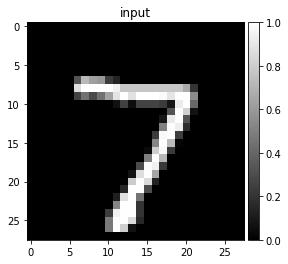

In [10]:
# Example of a mistaken number using np.where
mis_idx = np.where(y_test != y_pred)[0]
print(mis_idx)
print(mis_idx.shape)
print(list(zip(y_test[mis_idx], y_pred[mis_idx])))

# Visualize a convolved image
inputs = [K.learning_phase()] + model2.inputs

_convout2_f = K.function(inputs, [convout2.output])
def convout2_f(X):
    # the [0] is to disable the training phase flag
    return _convout2_f([0] + [X])
    
i = mis_idx[0]

# Visualize the first layer of convolutions on an input image
X = X_test[i:i+1]
print(X.shape)
print("target: {}".format(y_test[i]))
print("predicted: {}".format(y_pred[i]))
X.reshape(28, 28)
plt.figure()
plt.title('input')
nice_imshow(plt.gca(), np.squeeze(X), vmin=0, vmax=1, cmap=cm.gray)
plt.show()

9
<class 'keras.layers.convolutional.Conv2D'>
W shape :  (3, 3, 32)
32
(3, 3)


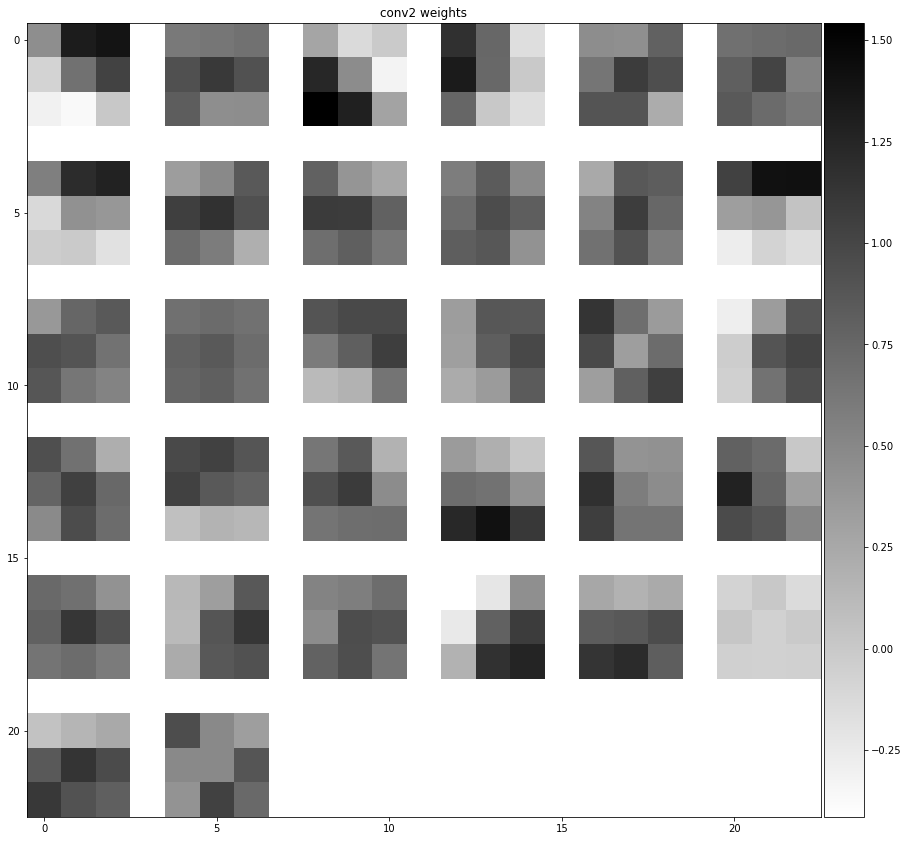

In [11]:
# Visualize Weights
print(len(model2.layers))
print(type(model2.layers[0]))
W = model2.layers[0].get_weights()[0]
W = np.squeeze(W)
print("W shape : ", W.shape)

plt.figure(figsize=(15, 15))
plt.title('conv2 weights')
nice_imshow(plt.gca(), make_mosaic(W, 6, 6), cmap=cm.binary)
plt.show()

C1 shape :  (28, 28, 32)
32
(28, 28)


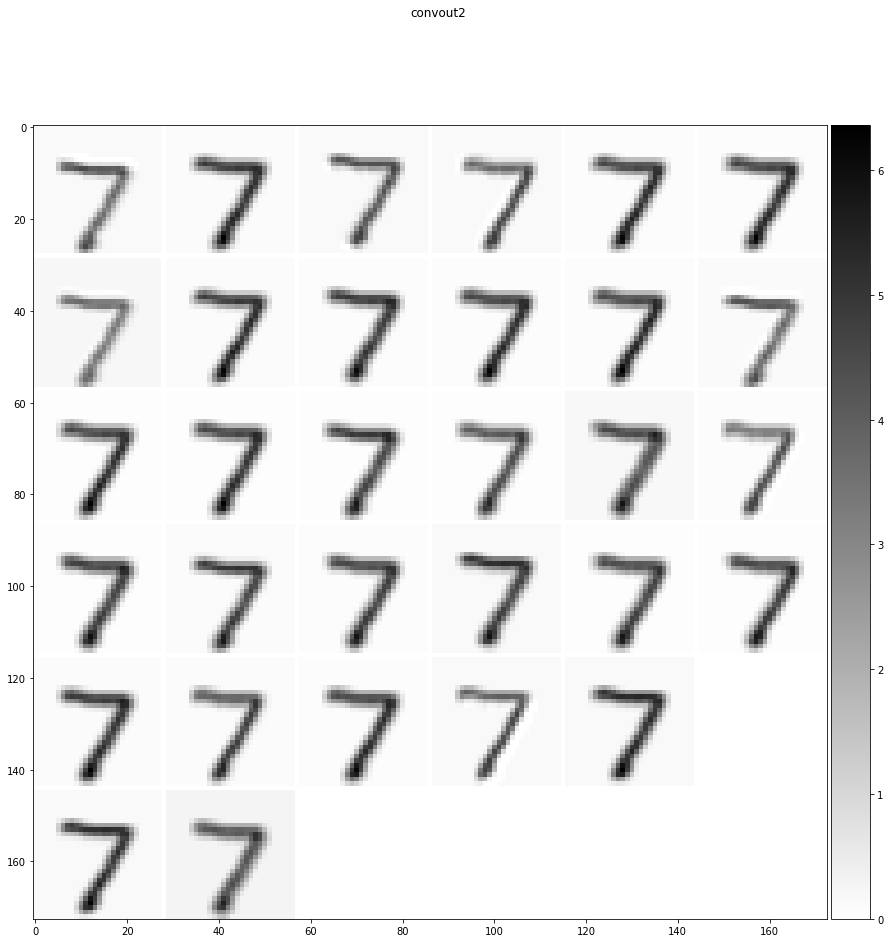

In [12]:
# Visualize convolution result (after activation)
C1 = convout2_f(X)
C1 = np.squeeze(C1)
print("C1 shape : ", C1.shape)

plt.figure(figsize=(15, 15))
plt.suptitle('convout2')
nice_imshow(plt.gca(), make_mosaic(C1, 6, 6), cmap=cm.binary)
plt.show()

Questions:

How many hidden layers are in your network?
The hidden layers of a CNN typically consist of convolutional layers, pooling layers, fully connected layers, and normalization layers. In model2, we have 2 Convolutional layers, 1 hidden layer, one fully connected layer, and one flattening layer. In total, this is 5 hidden layers.

How many convolutions are calculated in each convolution layer?
In our model of a convolutional neural network, we are using a technique called padding. To briefly explain why we need padding: When we take our 3 by 3 kernel with 9 spots within it, if the center of our kernel is close enough to the edge, part of our 3 by 3 kernel will be off the photo. To combat this, specifying the padding allows us to handle that situation in our neural network, and let our kernel hang off the edge by one space in the x direction and one space in the y direction. If each image is 28 by 28, we will have a total of 784 spaces. In order to accounts for the extra row we will need on all sides for our 1 by 1 padding, we will multiply the length of a row of pixels by 4, and then add 4 (for the 4 off-grid pixels in the corner). So, the resulting spaces will be 784 + 4 + 28 * 4 which is 900. Because of the fact that our convolutions are able to hang off of the edge by 1 space, and the stride length is set to (1, 1), a centered convolution will occur once in every single of the 784 spaces in the 28 by 28 image. This means that 784 convolutions are calculated in each layer.

Run a single test example through the model and print some of the convolved images from the first layer. Can you see any features from the image that are revealed by printing?
Yes, the convolved images that are printed look like various shades of the number that is trying to be predicted. You can notice that in some convolved images, the inside of the image is completely shaded, but in other examples, the outer edge of the image is shaed, and the inside is white. In addition to this, different versions of the image have different areas that appear to be more "focused on," and shaded.

Print a couple of the convolution kernels as matrices (no need to print images). What kind of patterns can you see in the convolution kernels?
It is hard to distinguish much of a pattern on the weights, to be honest. 